# Rice Classification

In [1]:
import numpy as np
import seaborn as sns

## Prezentacja bazy danych

Klasyfikowane rodzaje ryżu: 1 - Jasmine (ryż jaśminowy), 0 - Gonen.

In [2]:
import pandas as pd
df = pd.read_csv('data/riceClassification.csv') 
print(df.shape)
df.describe()

(18185, 12)


,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [3]:
# możemy pozbyć się kolumny id
df = df.drop(df.columns[0], axis = 1)
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


## Preprocessing

In [4]:
from sklearn.model_selection import train_test_split
# podział bazy danych na zbiór testowy i treningowy
classes = df.Class
inputs = df.drop(df.columns[10], axis = 1)
train_inputs, test_inputs, train_classes, test_classes = train_test_split(inputs, classes, train_size=0.7, random_state=277090)

In [5]:
from sklearn.preprocessing import StandardScaler
# skalowanie
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

In [6]:
from sklearn.decomposition import PCA
# pca
pca = PCA()
pca.fit(inputs_scaled)
data = pd.DataFrame(pca.components_, columns=inputs.columns)
data['explained_var'] = pca.explained_variance_ratio_
data['explained_var_cumsum'] = data['explained_var'].cumsum()
data
# pierwsze trzy komponenty wyjaśniają łącznie ponad 95% wariancji, ograniczymy się do nich

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,explained_var,explained_var_cumsum
0,-0.382712,-0.153668,-0.392052,0.291012,-0.382111,-0.380981,-0.132351,-0.297461,-0.308990,0.314476,0.638211,0.638211
1,-0.154081,-0.563745,0.069236,-0.387248,-0.157655,-0.165921,0.192156,-0.399377,0.353253,-0.360693,0.260614,0.898825
2,-0.018595,0.097950,-0.070727,0.137661,-0.020027,-0.015129,0.971641,0.024917,-0.083476,0.117483,0.083870,0.982695
3,-0.094718,-0.193225,0.078362,-0.545395,-0.030952,-0.100919,0.038340,0.378290,-0.698599,-0.079620,0.011490,0.994185
4,0.048672,-0.379696,0.074867,0.642875,0.104731,0.027434,0.000201,0.149357,-0.256866,-0.578412,0.004485,0.998670
5,0.425136,-0.453585,0.146119,0.042643,0.477528,-0.059431,0.000911,-0.300902,-0.179899,0.485675,0.000860,0.999530
6,-0.263758,-0.345619,0.515518,0.159921,-0.357658,0.272029,-0.000784,0.346221,0.182061,0.405846,0.000258,0.999788
7,0.163362,-0.312732,-0.542975,-0.025165,0.090444,-0.256908,-0.001369,0.598156,0.366734,0.116571,0.000155,0.999942
8,-0.492809,0.148040,0.341571,0.065324,0.509537,-0.567619,-0.000214,0.118388,0.135098,0.014080,0.000040,0.999982
9,0.546122,0.150235,0.355178,0.057994,-0.439373,-0.591973,0.000310,0.061372,0.022200,-0.043880,0.000018,1.000000


In [7]:
inputs_pca = pca.transform(inputs_scaled)
df_pca = pd.DataFrame(inputs_pca[:,:3], columns=['PCA1', 'PCA2', 'PCA3'])
df_pca['Class'] = df.Class
df_pca.head()

,PCA1,PCA2,PCA3,Class
0,0.354083,8.442447,-1.355742,1
1,2.854920,11.013745,-0.931820,1
2,2.482805,11.056600,-0.515969,1
3,2.493232,10.949386,-0.246925,1
4,1.581389,9.952350,-0.305457,1


In [8]:
# podział drugiej bazy danych na zbiór testowy i treningowy
train_inputs2, test_inputs2, train_classes2, test_classes2 = train_test_split(inputs_pca[:,:3], classes, train_size=0.7, random_state=277090)

## Klasyfikatory

In [9]:
# 1. drzewo decyzyjne
from sklearn import tree
DD = tree.DecisionTreeClassifier()
DD = DD.fit(train_inputs, train_classes)

[Text(0.6339094606164384, 0.96875, 'x[2] <= 58.579\ngini = 0.494\nsamples = 12729\nvalue = [5675, 7054]'),
 Text(0.3920697773972603, 0.90625, 'x[2] <= 57.448\ngini = 0.028\nsamples = 7059\nvalue = [100, 6959]'),
 Text(0.2533176369863014, 0.84375, 'x[8] <= 0.702\ngini = 0.017\nsamples = 6894\nvalue = [58, 6836]'),
 Text(0.1658818493150685, 0.78125, 'x[7] <= 454.032\ngini = 0.005\nsamples = 6233\nvalue = [15, 6218]'),
 Text(0.11772260273972603, 0.71875, 'x[8] <= 0.695\ngini = 0.004\nsamples = 6230\nvalue = [14, 6216]'),
 Text(0.04195205479452055, 0.65625, 'x[8] <= 0.663\ngini = 0.003\nsamples = 6012\nvalue = [8, 6004]'),
 Text(0.02054794520547945, 0.59375, 'x[9] <= 2.941\ngini = 0.0\nsamples = 4105\nvalue = [1, 4104]'),
 Text(0.0136986301369863, 0.53125, 'x[3] <= 0.94\ngini = 0.002\nsamples = 830\nvalue = [1, 829]'),
 Text(0.00684931506849315, 0.46875, 'gini = 0.0\nsamples = 829\nvalue = [0, 829]'),
 Text(0.02054794520547945, 0.46875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.0

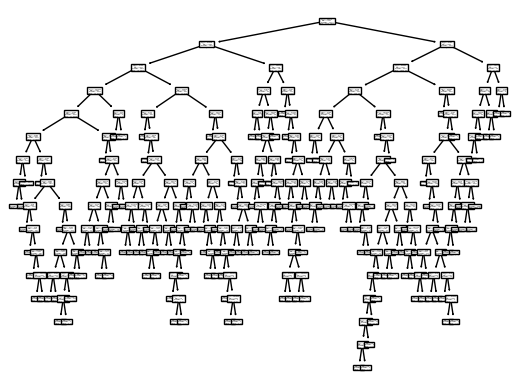

In [10]:
tree.plot_tree(DD)

In [11]:
from sklearn.metrics import accuracy_score
set1, set2 = [], []
set1.append(accuracy_score(test_classes, DD.predict(test_inputs)))
print(accuracy_score(test_classes, DD.predict(test_inputs)))

0.9836876832844574


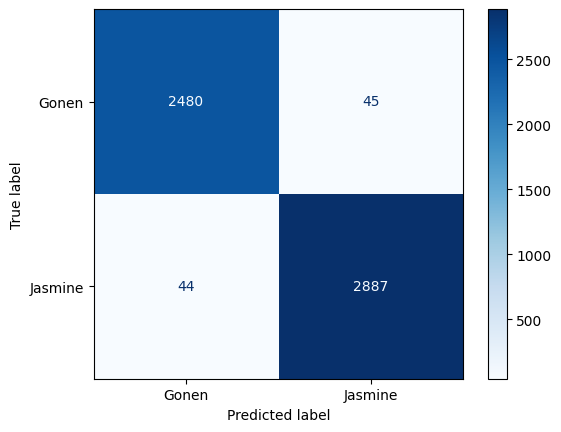

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# labels: Jasmine - 1, Gonen - 0
cmap = plt.cm.Blues
cm = confusion_matrix(test_classes, DD.predict(test_inputs), labels = DD.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Gonen', 'Jasmine'])
cm_display.plot(cmap=cmap)
plt.show()

[Text(0.3877016129032258, 0.9705882352941176, 'x[0] <= 0.109\ngini = 0.494\nsamples = 12729\nvalue = [5675, 7054]'),
 Text(0.1627016129032258, 0.9117647058823529, 'x[0] <= -0.13\ngini = 0.028\nsamples = 5547\nvalue = [5467, 80]'),
 Text(0.09314516129032258, 0.8529411764705882, 'x[2] <= 2.056\ngini = 0.008\nsamples = 5404\nvalue = [5382, 22]'),
 Text(0.08669354838709678, 0.7941176470588235, 'x[0] <= -0.347\ngini = 0.007\nsamples = 5402\nvalue = [5382, 20]'),
 Text(0.031451612903225803, 0.7352941176470589, 'x[0] <= -0.921\ngini = 0.003\nsamples = 5280\nvalue = [5273, 7]'),
 Text(0.012903225806451613, 0.6764705882352942, 'x[1] <= 7.52\ngini = 0.0\nsamples = 4951\nvalue = [4950, 1]'),
 Text(0.0064516129032258064, 0.6176470588235294, 'gini = 0.0\nsamples = 4940\nvalue = [4940, 0]'),
 Text(0.01935483870967742, 0.6176470588235294, 'x[0] <= -1.559\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.012903225806451613, 0.5588235294117647, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(

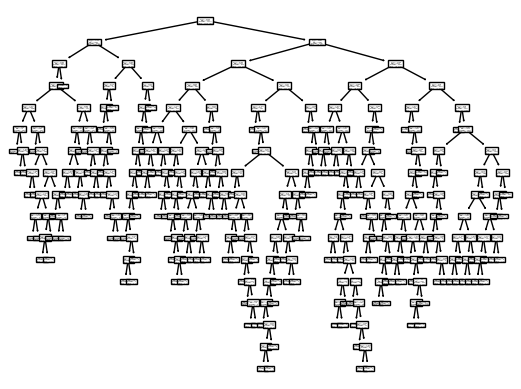

In [13]:
DD = DD.fit(train_inputs2, train_classes2)
tree.plot_tree(DD)

In [14]:
set2.append(accuracy_score(test_classes2, DD.predict(test_inputs2)))
print(accuracy_score(test_classes2, DD.predict(test_inputs2)))

0.9846041055718475


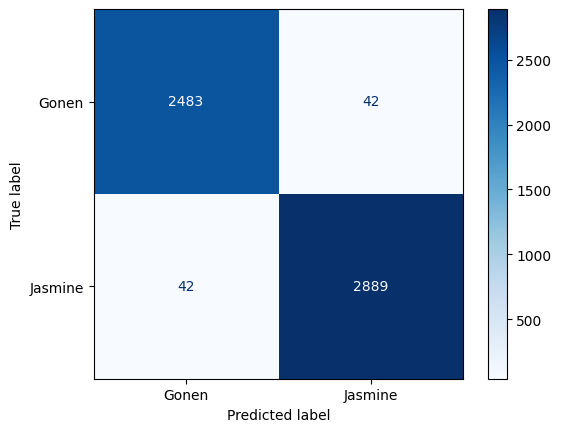

In [15]:
cm = confusion_matrix(test_classes2, DD.predict(test_inputs2), labels = DD.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Gonen', 'Jasmine'])
cm_display.plot(cmap=cmap)
plt.show()

In [16]:
# 2. drzewo z przyciętymi gałęziami do maksymalnej głębokości równej 5
DD = tree.DecisionTreeClassifier(max_depth=5)
DD = DD.fit(train_inputs, train_classes)

[Text(0.5465686274509803, 0.9166666666666666, 'x[2] <= 58.579\ngini = 0.494\nsamples = 12729\nvalue = [5675, 7054]'),
 Text(0.29901960784313725, 0.75, 'x[2] <= 57.448\ngini = 0.028\nsamples = 7059\nvalue = [100, 6959]'),
 Text(0.1568627450980392, 0.5833333333333334, 'x[8] <= 0.702\ngini = 0.017\nsamples = 6894\nvalue = [58, 6836]'),
 Text(0.0784313725490196, 0.4166666666666667, 'x[7] <= 454.032\ngini = 0.005\nsamples = 6233\nvalue = [15, 6218]'),
 Text(0.0392156862745098, 0.25, 'x[8] <= 0.695\ngini = 0.004\nsamples = 6230\nvalue = [14, 6216]'),
 Text(0.0196078431372549, 0.08333333333333333, 'gini = 0.003\nsamples = 6012\nvalue = [8, 6004]'),
 Text(0.058823529411764705, 0.08333333333333333, 'gini = 0.054\nsamples = 218\nvalue = [6, 212]'),
 Text(0.11764705882352941, 0.25, 'x[4] <= 6570.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.09803921568627451, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.13725490196078433, 0.08333333333333333, 'gini = 0.0\nsam

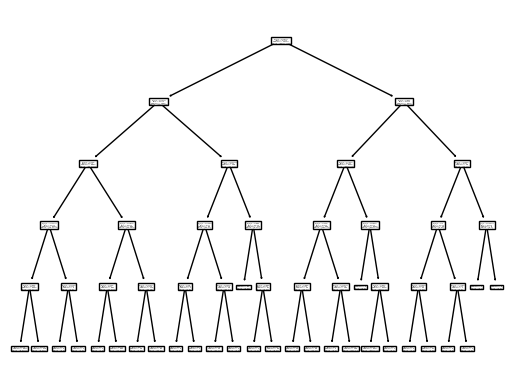

In [17]:
tree.plot_tree(DD)

In [18]:
set1.append(accuracy_score(test_classes, DD.predict(test_inputs)))
print(accuracy_score(test_classes, DD.predict(test_inputs)))

0.9890029325513197


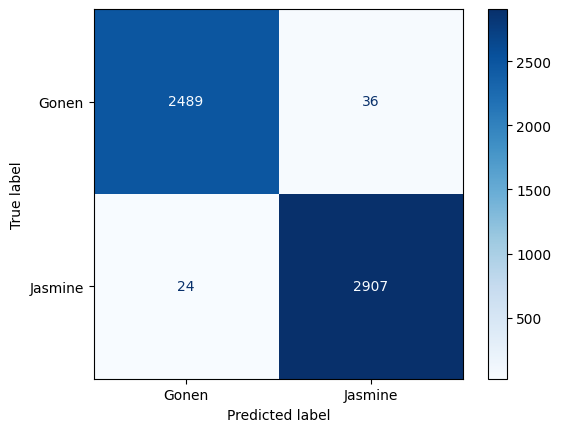

In [19]:
cm = confusion_matrix(test_classes, DD.predict(test_inputs), labels = DD.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Gonen', 'Jasmine'])
cm_display.plot(cmap=cmap)
plt.show()

[Text(0.4270833333333333, 0.9166666666666666, 'x[0] <= 0.109\ngini = 0.494\nsamples = 12729\nvalue = [5675, 7054]'),
 Text(0.1875, 0.75, 'x[0] <= -0.13\ngini = 0.028\nsamples = 5547\nvalue = [5467, 80]'),
 Text(0.10416666666666667, 0.5833333333333334, 'x[2] <= 2.056\ngini = 0.008\nsamples = 5404\nvalue = [5382, 22]'),
 Text(0.08333333333333333, 0.4166666666666667, 'x[0] <= -0.347\ngini = 0.007\nsamples = 5402\nvalue = [5382, 20]'),
 Text(0.041666666666666664, 0.25, 'x[0] <= -0.921\ngini = 0.003\nsamples = 5280\nvalue = [5273, 7]'),
 Text(0.020833333333333332, 0.08333333333333333, 'gini = 0.0\nsamples = 4951\nvalue = [4950, 1]'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.036\nsamples = 329\nvalue = [323, 6]'),
 Text(0.125, 0.25, 'x[1] <= 0.365\ngini = 0.19\nsamples = 122\nvalue = [109, 13]'),
 Text(0.10416666666666667, 0.08333333333333333, 'gini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.14583333333333334, 0.08333333333333333, 'gini = 0.038\nsamples = 102\nvalue = [100, 2]'),


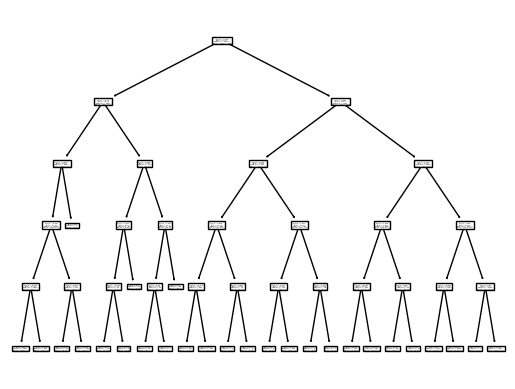

In [20]:
DD = DD.fit(train_inputs2, train_classes2)
tree.plot_tree(DD)

In [21]:
set2.append(accuracy_score(test_classes2, DD.predict(test_inputs2)))
print(accuracy_score(test_classes2, DD.predict(test_inputs2)))

0.9888196480938416


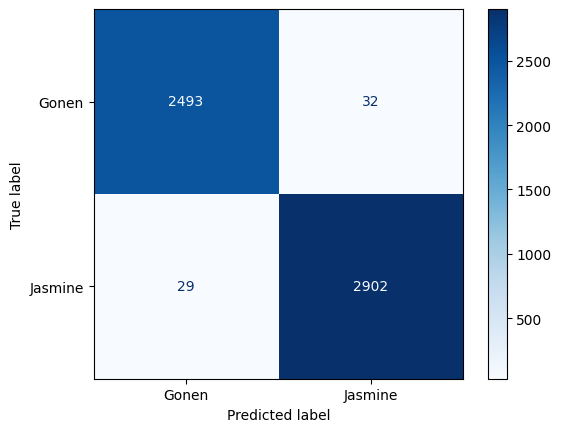

In [22]:
cm = confusion_matrix(test_classes2, DD.predict(test_inputs2), labels = DD.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Gonen', 'Jasmine'])
cm_display.plot(cmap=cmap)
plt.show()

In [23]:
# 3. naiwny Bayes
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(train_inputs, train_classes)
set1.append(accuracy_score(test_classes, NB.predict(test_inputs)))
print(accuracy_score(test_classes, NB.predict(test_inputs)))

0.9774560117302052


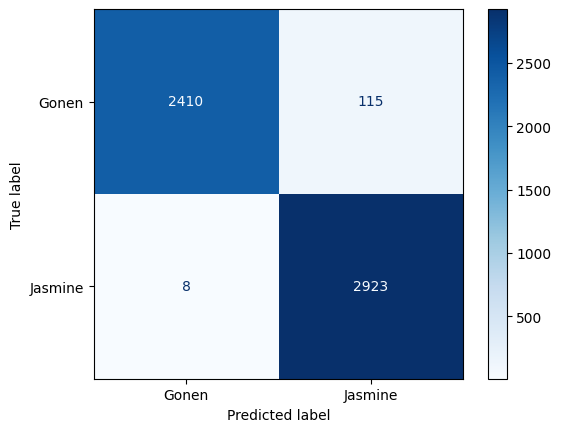

In [24]:
cm = confusion_matrix(test_classes, NB.predict(test_inputs), labels = NB.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Gonen', 'Jasmine'])
cm_display.plot(cmap=cmap)
plt.show()

In [25]:
NB = GaussianNB()
NB.fit(train_inputs2, train_classes2)
set2.append(accuracy_score(test_classes2, NB.predict(test_inputs2)))
print(accuracy_score(test_classes2, NB.predict(test_inputs2)))

0.9792888563049853


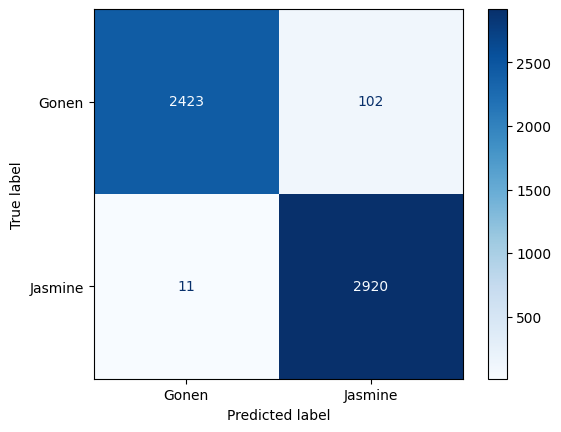

In [26]:
cm = confusion_matrix(test_classes2, NB.predict(test_inputs2), labels = NB.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Gonen', 'Jasmine'])
cm_display.plot(cmap=cmap)
plt.show()

In [27]:
# 4. k-najbliższych sąsiadów
from sklearn.neighbors import KNeighborsClassifier
NN3 = KNeighborsClassifier(n_neighbors=3)
NN3.fit(train_inputs, train_classes)
set1.append(accuracy_score(test_classes, NN3.predict(test_inputs)))
print(accuracy_score(test_classes, NN3.predict(test_inputs)))

0.9851539589442815


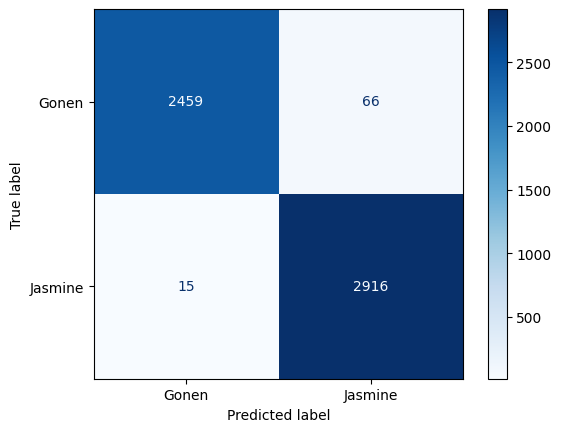

In [28]:
cm = confusion_matrix(test_classes, NN3.predict(test_inputs), labels = NN3.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Gonen', 'Jasmine'])
cm_display.plot(cmap=cmap)
plt.show()

In [29]:
NN3 = KNeighborsClassifier(n_neighbors=3)
NN3.fit(train_inputs2, train_classes2)
set2.append(accuracy_score(test_classes2, NN3.predict(test_inputs2)))
print(accuracy_score(test_classes2, NN3.predict(test_inputs2)))

0.9884530791788856


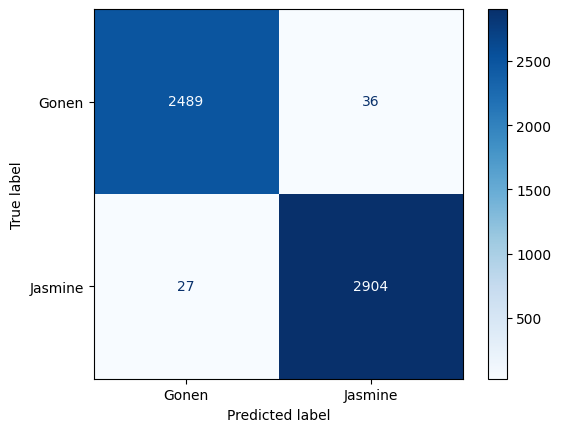

In [30]:
cm = confusion_matrix(test_classes2, NN3.predict(test_inputs2), labels = NN3.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Gonen', 'Jasmine'])
cm_display.plot(cmap=cmap)
plt.show()

In [31]:
# 5.
NN5 = KNeighborsClassifier(n_neighbors=5)
NN5.fit(train_inputs, train_classes)
set1.append(accuracy_score(test_classes, NN5.predict(test_inputs)))
print(accuracy_score(test_classes, NN5.predict(test_inputs)))

0.9838709677419355


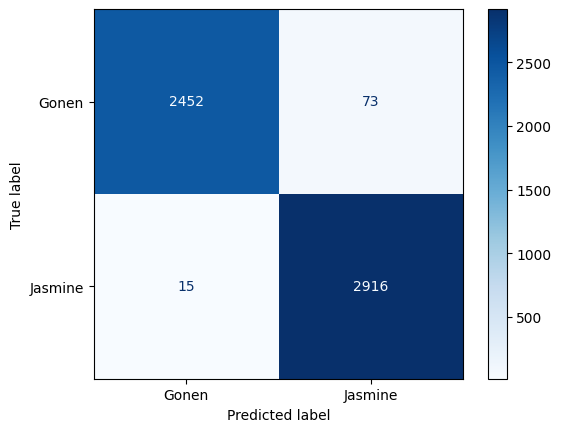

In [32]:
cm = confusion_matrix(test_classes, NN5.predict(test_inputs), labels = NN5.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Gonen', 'Jasmine'])
cm_display.plot(cmap=cmap)
plt.show()

In [33]:
NN5 = KNeighborsClassifier(n_neighbors=5)
NN5.fit(train_inputs2, train_classes2)
set2.append(accuracy_score(test_classes2, NN5.predict(test_inputs2)))
print(accuracy_score(test_classes2, NN5.predict(test_inputs2)))

0.9890029325513197


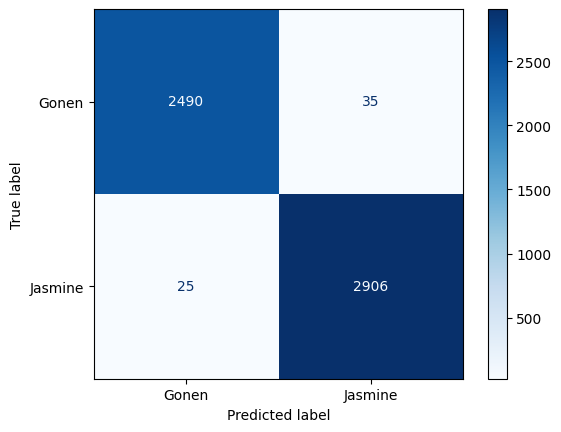

In [34]:
cm = confusion_matrix(test_classes2, NN5.predict(test_inputs2), labels = NN5.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Gonen', 'Jasmine'])
cm_display.plot(cmap=cmap)
plt.show()

In [35]:
# 6.
NN11 = KNeighborsClassifier(n_neighbors=11)
NN11.fit(train_inputs, train_classes)
set1.append(accuracy_score(test_classes, NN11.predict(test_inputs)))
print(accuracy_score(test_classes, NN11.predict(test_inputs)))

0.9785557184750733


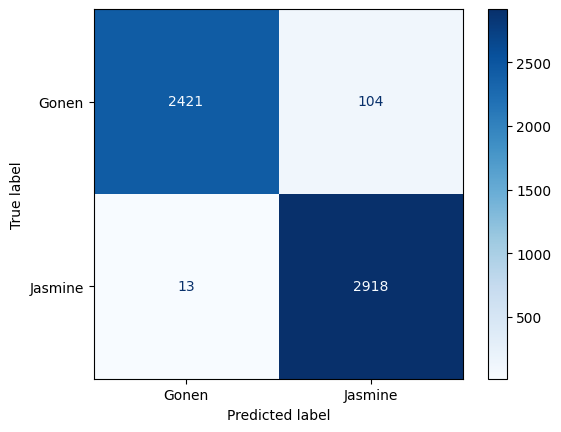

In [36]:
cm = confusion_matrix(test_classes, NN11.predict(test_inputs), labels = NN11.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Gonen', 'Jasmine'])
cm_display.plot(cmap=cmap)
plt.show()

In [37]:
NN11 = KNeighborsClassifier(n_neighbors=11)
NN11.fit(train_inputs2, train_classes2)
set2.append(accuracy_score(test_classes2, NN11.predict(test_inputs2)))
print(accuracy_score(test_classes2, NN11.predict(test_inputs2)))

0.9897360703812317


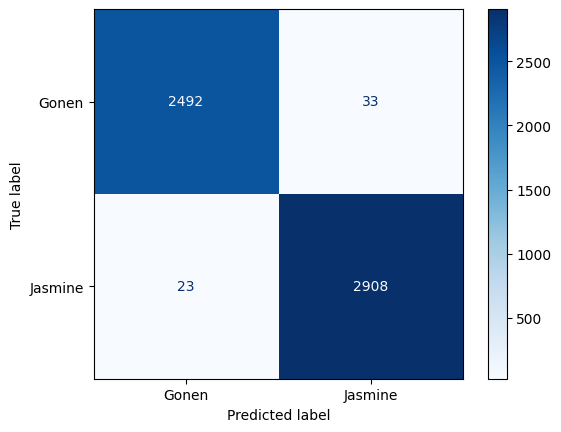

In [38]:
cm = confusion_matrix(test_classes2, NN11.predict(test_inputs2), labels = NN11.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Gonen', 'Jasmine'])
cm_display.plot(cmap=cmap)
plt.show()

In [39]:
# 7. sieć neuronowa
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
model = Sequential()
model.add(Dense(64, input_dim=10, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_inputs, train_classes, epochs=10, batch_size=32)

loss, accuracy = model.evaluate(test_inputs, test_classes)
set1.append(accuracy)
print(f'Loss: {loss}, Dokładność: {accuracy}')

Epoch 1/10
398/398 [==============================] - 1s 1ms/step - loss: 8.8954 - accuracy: 0.6548
Epoch 2/10
398/398 [==============================] - 0s 1ms/step - loss: 0.2822 - accuracy: 0.9220
Epoch 3/10
398/398 [==============================] - 0s 1ms/step - loss: 1.1132 - accuracy: 0.8657
Epoch 4/10
398/398 [==============================] - 0s 1ms/step - loss: 0.2565 - accuracy: 0.9462
Epoch 5/10
398/398 [==============================] - 1s 1ms/step - loss: 0.3138 - accuracy: 0.9434
Epoch 6/10
398/398 [==============================] - 0s 1ms/step - loss: 0.5300 - accuracy: 0.9311
Epoch 7/10
398/398 [==============================] - 0s 1ms/step - loss: 0.3727 - accuracy: 0.9443
Epoch 8/10
398/398 [==============================] - 0s 1ms/step - loss: 0.2794 - accuracy: 0.9569
Epoch 9/10
398/398 [==============================] - 0s 1ms/step - loss: 0.8094 - accuracy: 0.9302
Epoch 10/10
171/171 [==============================] - 0s 1ms/step - loss: 0.3069 - accuracy: 0.9646

171/171 [==============================] - 0s 969us/step


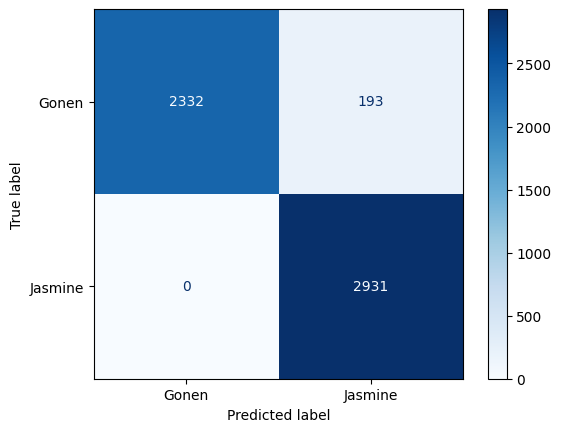

In [40]:
test_predictions = (model.predict(test_inputs) > 0.5).astype(int)
cm = confusion_matrix(test_classes, test_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Gonen', 'Jasmine'])
cm_display.plot(cmap=cmap)
plt.show()

Epoch 1/10
319/319 [==============================] - 1s 2ms/step - loss: 0.3546 - accuracy: 0.9563 - val_loss: 1.5836 - val_accuracy: 0.8680
Epoch 2/10
319/319 [==============================] - 1s 2ms/step - loss: 0.6113 - accuracy: 0.9439 - val_loss: 0.1552 - val_accuracy: 0.9804
Epoch 3/10
319/319 [==============================] - 1s 2ms/step - loss: 0.5206 - accuracy: 0.9537 - val_loss: 1.1249 - val_accuracy: 0.8716
Epoch 4/10
319/319 [==============================] - 0s 1ms/step - loss: 0.3540 - accuracy: 0.9608 - val_loss: 0.0767 - val_accuracy: 0.9804
Epoch 5/10
319/319 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.9570 - val_loss: 0.1922 - val_accuracy: 0.9623
Epoch 6/10
319/319 [==============================] - 0s 2ms/step - loss: 0.2480 - accuracy: 0.9671 - val_loss: 0.8160 - val_accuracy: 0.8747
Epoch 7/10
319/319 [==============================] - 0s 2ms/step - loss: 0.4970 - accuracy: 0.9509 - val_loss: 0.1743 - val_accuracy: 0.9811
Epoch 

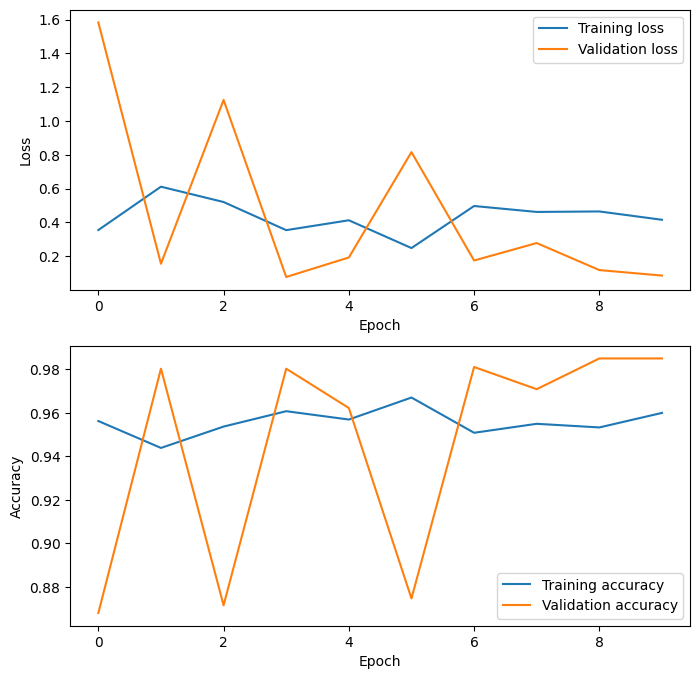

In [41]:
history = model.fit(train_inputs, train_classes, validation_split=0.2, epochs=10, batch_size=32)

fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].plot(history.history['loss'], label='Training loss')
ax[0].plot(history.history['val_loss'], label='Validation loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'], label='Training accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.show()

In [42]:
model = Sequential()
model.add(Dense(8, input_dim = 3, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_inputs2, train_classes2, epochs=10, batch_size=32)

loss, accuracy = model.evaluate(test_inputs2, test_classes2)
set2.append(accuracy)
print(f'Loss: {loss}, Dokładność: {accuracy}')

Epoch 1/10
398/398 [==============================] - 1s 1ms/step - loss: 0.3689 - accuracy: 0.8817
Epoch 2/10
398/398 [==============================] - 0s 1ms/step - loss: 0.0668 - accuracy: 0.9837
Epoch 3/10
398/398 [==============================] - 0s 1ms/step - loss: 0.0440 - accuracy: 0.9868
Epoch 4/10
398/398 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9871
Epoch 5/10
398/398 [==============================] - 0s 1ms/step - loss: 0.0389 - accuracy: 0.9875
Epoch 6/10
398/398 [==============================] - 0s 1ms/step - loss: 0.0382 - accuracy: 0.9877
Epoch 7/10
398/398 [==============================] - 0s 1ms/step - loss: 0.0378 - accuracy: 0.9881
Epoch 8/10
398/398 [==============================] - 1s 1ms/step - loss: 0.0373 - accuracy: 0.9881
Epoch 9/10
398/398 [==============================] - 0s 1ms/step - loss: 0.0371 - accuracy: 0.9885
Epoch 10/10
171/171 [==============================] - 0s 1ms/step - loss: 0.0326 - accuracy: 0.9894

171/171 [==============================] - 0s 920us/step


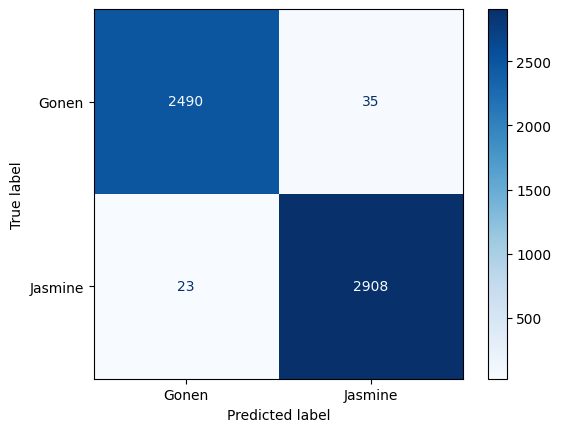

In [43]:
test_predictions = (model.predict(test_inputs2) > 0.5).astype(int)
cm = confusion_matrix(test_classes2, test_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Gonen', 'Jasmine'])
cm_display.plot(cmap=cmap)
plt.show()

Epoch 1/10
319/319 [==============================] - 1s 2ms/step - loss: 0.0387 - accuracy: 0.9881 - val_loss: 0.0279 - val_accuracy: 0.9902
Epoch 2/10
319/319 [==============================] - 1s 2ms/step - loss: 0.0385 - accuracy: 0.9881 - val_loss: 0.0287 - val_accuracy: 0.9902
Epoch 3/10
319/319 [==============================] - 0s 2ms/step - loss: 0.0383 - accuracy: 0.9884 - val_loss: 0.0280 - val_accuracy: 0.9906
Epoch 4/10
319/319 [==============================] - 0s 2ms/step - loss: 0.0382 - accuracy: 0.9878 - val_loss: 0.0279 - val_accuracy: 0.9906
Epoch 5/10
319/319 [==============================] - 0s 1ms/step - loss: 0.0381 - accuracy: 0.9877 - val_loss: 0.0280 - val_accuracy: 0.9914
Epoch 6/10
319/319 [==============================] - 1s 2ms/step - loss: 0.0377 - accuracy: 0.9884 - val_loss: 0.0280 - val_accuracy: 0.9910
Epoch 7/10
319/319 [==============================] - 0s 1ms/step - loss: 0.0377 - accuracy: 0.9883 - val_loss: 0.0282 - val_accuracy: 0.9906
Epoch 

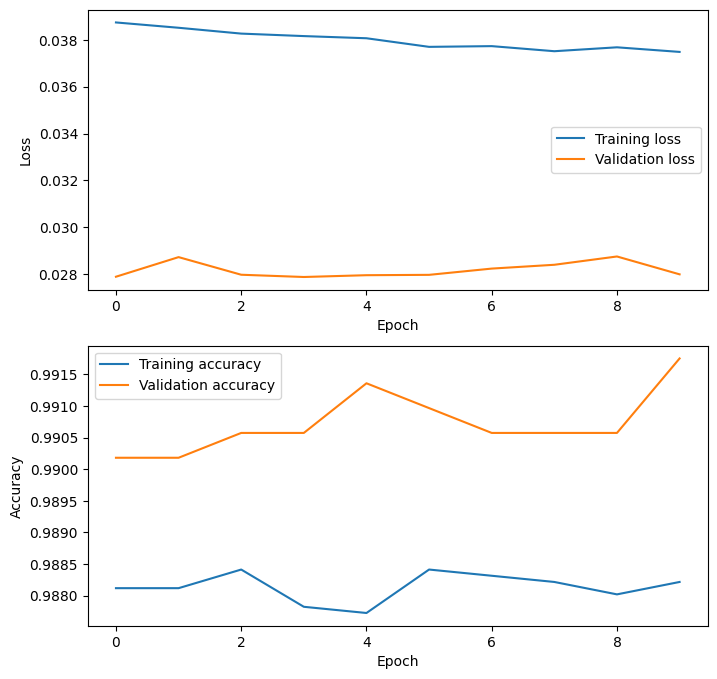

In [44]:
history = model.fit(train_inputs2, train_classes2, validation_split=0.2, epochs=10, batch_size=32)

fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].plot(history.history['loss'], label='Training loss')
ax[0].plot(history.history['val_loss'], label='Validation loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'], label='Training accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.show()

In [45]:
# 8. modyfikacja 1: dodanie warstw Dropout - zapobiegania przeuczeniu sieci lub zbyt małej złożoności
from keras.layers import Dropout
model = Sequential()
model.add(Dense(64, input_dim=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_inputs, train_classes, epochs=10, batch_size=32)

loss, accuracy = model.evaluate(test_inputs, test_classes)
set1.append(accuracy)
print(f'Loss: {loss}, Dokładność: {accuracy}')

Epoch 1/10
398/398 [==============================] - 1s 1ms/step - loss: 66.9056 - accuracy: 0.5454
Epoch 2/10
398/398 [==============================] - 1s 1ms/step - loss: 12.0247 - accuracy: 0.6725
Epoch 3/10
398/398 [==============================] - 1s 1ms/step - loss: 4.5983 - accuracy: 0.7527
Epoch 4/10
398/398 [==============================] - 1s 2ms/step - loss: 2.1048 - accuracy: 0.8022
Epoch 5/10
398/398 [==============================] - 1s 1ms/step - loss: 1.0450 - accuracy: 0.8304
Epoch 6/10
398/398 [==============================] - 1s 2ms/step - loss: 0.6667 - accuracy: 0.8600
Epoch 7/10
398/398 [==============================] - 1s 1ms/step - loss: 0.4775 - accuracy: 0.8932
Epoch 8/10
398/398 [==============================] - 1s 1ms/step - loss: 0.3464 - accuracy: 0.9141
Epoch 9/10
398/398 [==============================] - 1s 1ms/step - loss: 0.2495 - accuracy: 0.9334
Epoch 10/10
171/171 [==============================] - 0s 1ms/step - loss: 0.0740 - accuracy: 0.97

171/171 [==============================] - 0s 850us/step


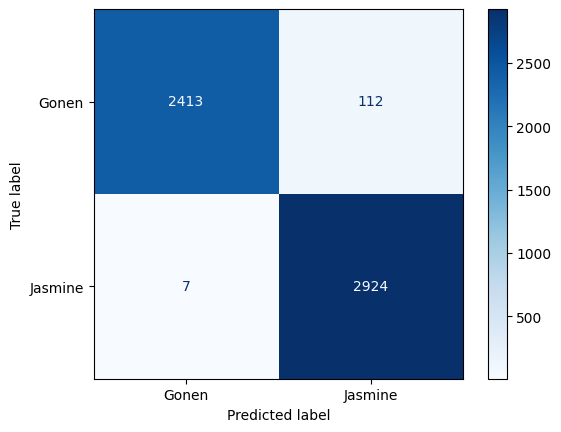

In [46]:
test_predictions = (model.predict(test_inputs) > 0.5).astype(int)
cm = confusion_matrix(test_classes, test_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Gonen', 'Jasmine'])
cm_display.plot(cmap=cmap)
plt.show()

Epoch 1/10
319/319 [==============================] - 1s 2ms/step - loss: 0.1772 - accuracy: 0.9527 - val_loss: 0.0661 - val_accuracy: 0.9811
Epoch 2/10
319/319 [==============================] - 1s 2ms/step - loss: 0.1479 - accuracy: 0.9551 - val_loss: 0.0639 - val_accuracy: 0.9796
Epoch 3/10
319/319 [==============================] - 1s 2ms/step - loss: 0.1358 - accuracy: 0.9542 - val_loss: 0.0638 - val_accuracy: 0.9808
Epoch 4/10
319/319 [==============================] - 1s 2ms/step - loss: 0.1292 - accuracy: 0.9598 - val_loss: 0.0626 - val_accuracy: 0.9808
Epoch 5/10
319/319 [==============================] - 1s 2ms/step - loss: 0.1227 - accuracy: 0.9624 - val_loss: 0.0603 - val_accuracy: 0.9796
Epoch 6/10
319/319 [==============================] - 1s 2ms/step - loss: 0.1187 - accuracy: 0.9645 - val_loss: 0.0666 - val_accuracy: 0.9780
Epoch 7/10
319/319 [==============================] - 1s 2ms/step - loss: 0.1266 - accuracy: 0.9605 - val_loss: 0.0936 - val_accuracy: 0.9682
Epoch 

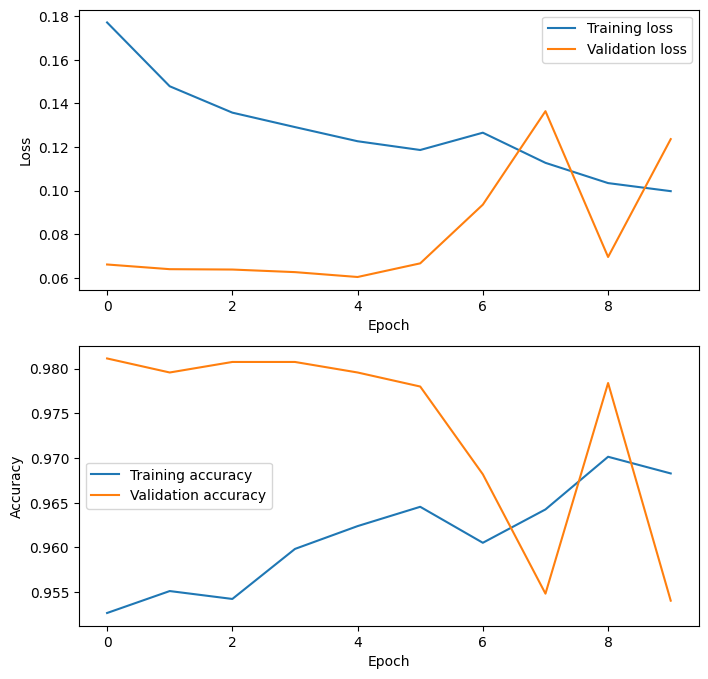

In [47]:
history = model.fit(train_inputs, train_classes, validation_split=0.2, epochs=10, batch_size=32)

fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].plot(history.history['loss'], label='Training loss')
ax[0].plot(history.history['val_loss'], label='Validation loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'], label='Training accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.show()

In [48]:
model = Sequential()
model.add(Dense(8, input_dim=3, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_inputs2, train_classes2, epochs=10, batch_size=32)

loss, accuracy = model.evaluate(test_inputs2, test_classes2)
set2.append(accuracy)
print(f'Loss: {loss}, Dokładność: {accuracy}')

Epoch 1/10
398/398 [==============================] - 1s 1ms/step - loss: 0.1483 - accuracy: 0.9738
Epoch 2/10
398/398 [==============================] - 1s 1ms/step - loss: 0.0588 - accuracy: 0.9817
Epoch 3/10
398/398 [==============================] - 1s 1ms/step - loss: 0.0514 - accuracy: 0.9832
Epoch 4/10
398/398 [==============================] - 1s 1ms/step - loss: 0.0493 - accuracy: 0.9830
Epoch 5/10
398/398 [==============================] - 1s 1ms/step - loss: 0.0477 - accuracy: 0.9860
Epoch 6/10
398/398 [==============================] - 1s 1ms/step - loss: 0.0474 - accuracy: 0.9859
Epoch 7/10
398/398 [==============================] - 1s 1ms/step - loss: 0.0446 - accuracy: 0.9855
Epoch 8/10
398/398 [==============================] - 1s 1ms/step - loss: 0.0447 - accuracy: 0.9855
Epoch 9/10
398/398 [==============================] - 0s 1ms/step - loss: 0.0472 - accuracy: 0.9852
Epoch 10/10
171/171 [==============================] - 0s 1ms/step - loss: 0.0333 - accuracy: 0.9886

171/171 [==============================] - 0s 849us/step


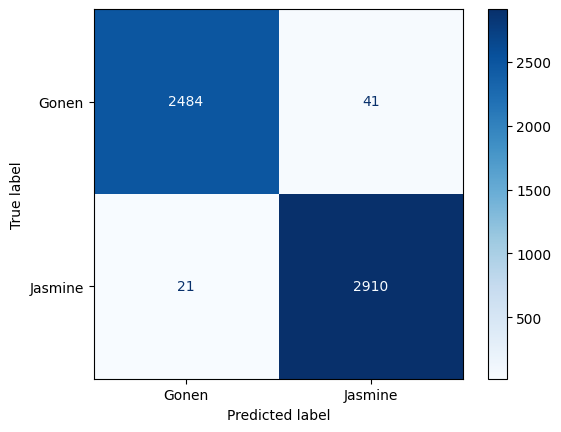

In [49]:
test_predictions = (model.predict(test_inputs2) > 0.5).astype(int)
cm = confusion_matrix(test_classes2, test_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Gonen', 'Jasmine'])
cm_display.plot(cmap=cmap)
plt.show()

Epoch 1/10
319/319 [==============================] - 1s 2ms/step - loss: 0.0488 - accuracy: 0.9850 - val_loss: 0.0286 - val_accuracy: 0.9890
Epoch 2/10
319/319 [==============================] - 1s 2ms/step - loss: 0.0456 - accuracy: 0.9858 - val_loss: 0.0288 - val_accuracy: 0.9894
Epoch 3/10
319/319 [==============================] - 1s 2ms/step - loss: 0.0460 - accuracy: 0.9857 - val_loss: 0.0294 - val_accuracy: 0.9898
Epoch 4/10
319/319 [==============================] - 1s 2ms/step - loss: 0.0473 - accuracy: 0.9859 - val_loss: 0.0292 - val_accuracy: 0.9894
Epoch 5/10
319/319 [==============================] - 1s 2ms/step - loss: 0.0467 - accuracy: 0.9858 - val_loss: 0.0294 - val_accuracy: 0.9898
Epoch 6/10
319/319 [==============================] - 1s 2ms/step - loss: 0.0460 - accuracy: 0.9862 - val_loss: 0.0289 - val_accuracy: 0.9898
Epoch 7/10
319/319 [==============================] - 1s 2ms/step - loss: 0.0448 - accuracy: 0.9868 - val_loss: 0.0292 - val_accuracy: 0.9898
Epoch 

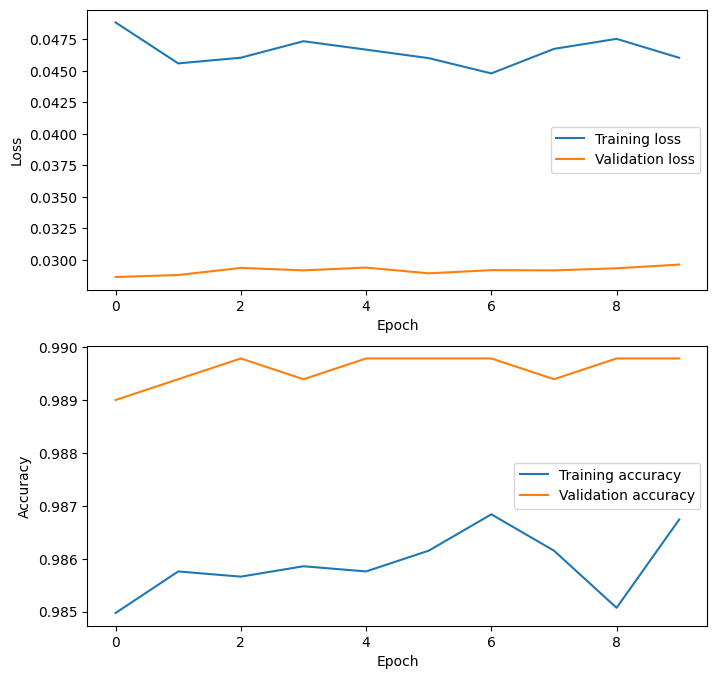

In [50]:
history = model.fit(train_inputs2, train_classes2, validation_split=0.2, epochs=10, batch_size=32)

fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].plot(history.history['loss'], label='Training loss')
ax[0].plot(history.history['val_loss'], label='Validation loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'], label='Training accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.show()

In [51]:
# 9. modyfikacja 2: zmiana optymalizatora
model = Sequential()
model.add(Dense(64, input_dim=10, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='AdaMax', metrics=['accuracy'])

model.fit(train_inputs, train_classes, epochs=10, batch_size=32)

loss, accuracy = model.evaluate(test_inputs, test_classes)
set1.append(accuracy)
print(f'Loss: {loss}, Dokładność: {accuracy}')

Epoch 1/10
398/398 [==============================] - 1s 1ms/step - loss: 11.1934 - accuracy: 0.7334
Epoch 2/10
398/398 [==============================] - 1s 1ms/step - loss: 0.3748 - accuracy: 0.9095
Epoch 3/10
398/398 [==============================] - 1s 2ms/step - loss: 0.4126 - accuracy: 0.9105
Epoch 4/10
398/398 [==============================] - 1s 2ms/step - loss: 0.2102 - accuracy: 0.9478
Epoch 5/10
398/398 [==============================] - 0s 1ms/step - loss: 0.3686 - accuracy: 0.9286
Epoch 6/10
398/398 [==============================] - 1s 2ms/step - loss: 0.2539 - accuracy: 0.9442
Epoch 7/10
398/398 [==============================] - 1s 1ms/step - loss: 0.2719 - accuracy: 0.9426
Epoch 8/10
398/398 [==============================] - 1s 1ms/step - loss: 0.2604 - accuracy: 0.9466
Epoch 9/10
398/398 [==============================] - 1s 1ms/step - loss: 0.2543 - accuracy: 0.9483
Epoch 10/10
171/171 [==============================] - 0s 1ms/step - loss: 0.0611 - accuracy: 0.981

171/171 [==============================] - 0s 1ms/step


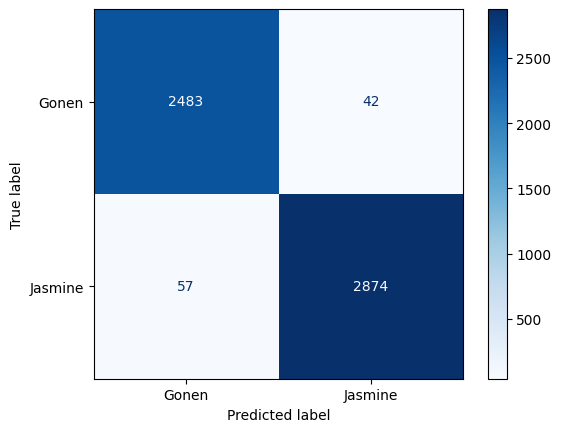

In [52]:
test_predictions = (model.predict(test_inputs) > 0.5).astype(int)
cm = confusion_matrix(test_classes, test_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Gonen', 'Jasmine'])
cm_display.plot(cmap=cmap)
plt.show()

Epoch 1/10
319/319 [==============================] - 1s 4ms/step - loss: 0.1982 - accuracy: 0.9605 - val_loss: 0.3712 - val_accuracy: 0.9136
Epoch 2/10
319/319 [==============================] - 1s 4ms/step - loss: 0.2946 - accuracy: 0.9482 - val_loss: 0.0637 - val_accuracy: 0.9819
Epoch 3/10
319/319 [==============================] - 1s 4ms/step - loss: 0.2818 - accuracy: 0.9538 - val_loss: 0.0831 - val_accuracy: 0.9823
Epoch 4/10
319/319 [==============================] - 1s 4ms/step - loss: 0.3414 - accuracy: 0.9501 - val_loss: 0.4724 - val_accuracy: 0.9360
Epoch 5/10
319/319 [==============================] - 1s 2ms/step - loss: 0.2646 - accuracy: 0.9565 - val_loss: 0.4043 - val_accuracy: 0.9156
Epoch 6/10
319/319 [==============================] - 1s 2ms/step - loss: 0.2999 - accuracy: 0.9541 - val_loss: 0.1577 - val_accuracy: 0.9713
Epoch 7/10
319/319 [==============================] - 1s 3ms/step - loss: 0.3309 - accuracy: 0.9507 - val_loss: 0.0976 - val_accuracy: 0.9725
Epoch 

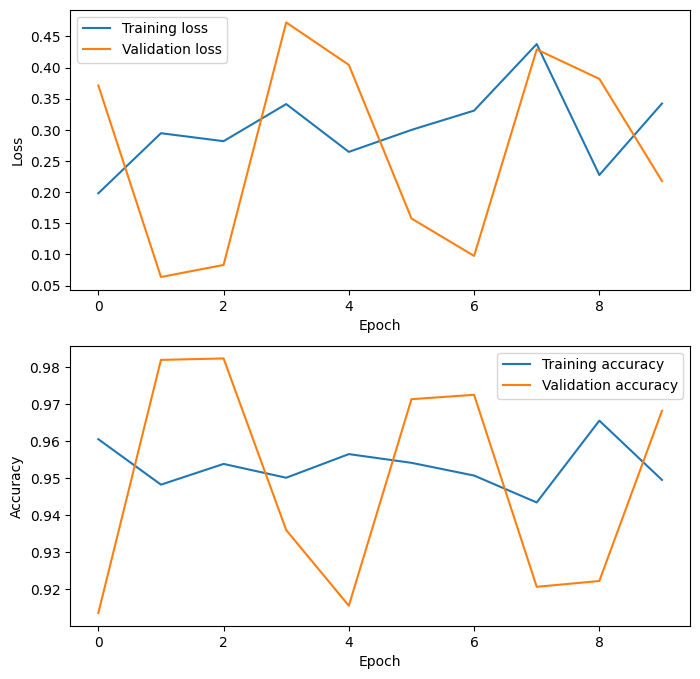

In [53]:
history = model.fit(train_inputs, train_classes, validation_split=0.2, epochs=10, batch_size=32)

fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].plot(history.history['loss'], label='Training loss')
ax[0].plot(history.history['val_loss'], label='Validation loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'], label='Training accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.show()

In [54]:
model = Sequential()
model.add(Dense(8, input_dim = 3, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='AdaMax', metrics=['accuracy'])

model.fit(train_inputs2, train_classes2, epochs=10, batch_size=32)

loss, accuracy = model.evaluate(test_inputs2, test_classes2)
set2.append(accuracy)
print(f'Loss: {loss}, Dokładność: {accuracy}')

Epoch 1/10
398/398 [==============================] - 1s 1ms/step - loss: 0.6183 - accuracy: 0.7177
Epoch 2/10
398/398 [==============================] - 0s 1ms/step - loss: 0.2148 - accuracy: 0.9599
Epoch 3/10
398/398 [==============================] - 0s 1ms/step - loss: 0.1027 - accuracy: 0.9797
Epoch 4/10
398/398 [==============================] - 0s 1ms/step - loss: 0.0655 - accuracy: 0.9839
Epoch 5/10
398/398 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9853
Epoch 6/10
398/398 [==============================] - 0s 1ms/step - loss: 0.0459 - accuracy: 0.9863
Epoch 7/10
398/398 [==============================] - 0s 1ms/step - loss: 0.0436 - accuracy: 0.9863
Epoch 8/10
398/398 [==============================] - 0s 1ms/step - loss: 0.0421 - accuracy: 0.9869
Epoch 9/10
398/398 [==============================] - 1s 1ms/step - loss: 0.0410 - accuracy: 0.9874
Epoch 10/10
171/171 [==============================] - 0s 1ms/step - loss: 0.0362 - accuracy: 0.9896

171/171 [==============================] - 0s 972us/step


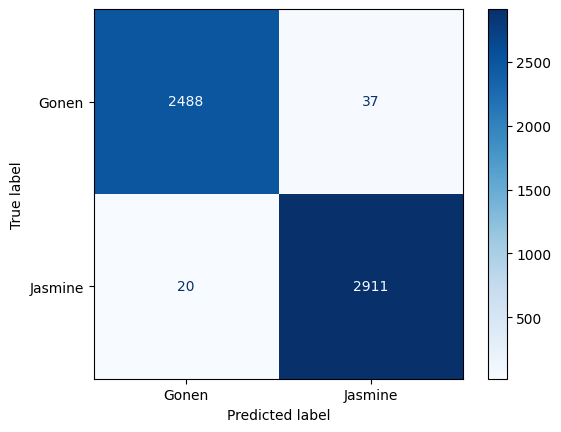

In [55]:
test_predictions = (model.predict(test_inputs2) > 0.5).astype(int)
cm = confusion_matrix(test_classes2, test_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Gonen', 'Jasmine'])
cm_display.plot(cmap=cmap)
plt.show()

Epoch 1/10
319/319 [==============================] - 1s 2ms/step - loss: 0.0414 - accuracy: 0.9873 - val_loss: 0.0331 - val_accuracy: 0.9898
Epoch 2/10
319/319 [==============================] - 0s 2ms/step - loss: 0.0411 - accuracy: 0.9876 - val_loss: 0.0328 - val_accuracy: 0.9902
Epoch 3/10
319/319 [==============================] - 1s 2ms/step - loss: 0.0409 - accuracy: 0.9875 - val_loss: 0.0327 - val_accuracy: 0.9898
Epoch 4/10
319/319 [==============================] - 1s 2ms/step - loss: 0.0407 - accuracy: 0.9877 - val_loss: 0.0324 - val_accuracy: 0.9898
Epoch 5/10
319/319 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9877 - val_loss: 0.0322 - val_accuracy: 0.9902
Epoch 6/10
319/319 [==============================] - 1s 2ms/step - loss: 0.0403 - accuracy: 0.9882 - val_loss: 0.0319 - val_accuracy: 0.9902
Epoch 7/10
319/319 [==============================] - 0s 2ms/step - loss: 0.0401 - accuracy: 0.9882 - val_loss: 0.0317 - val_accuracy: 0.9902
Epoch 

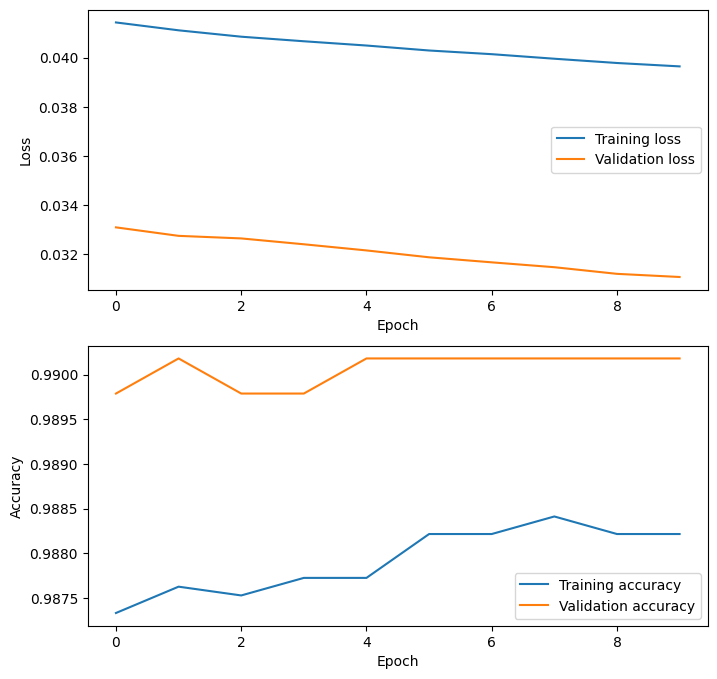

In [56]:
history = model.fit(train_inputs2, train_classes2, validation_split=0.2, epochs=10, batch_size=32)

fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].plot(history.history['loss'], label='Training loss')
ax[0].plot(history.history['val_loss'], label='Validation loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'], label='Training accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.show()

In [57]:
# 10. modyfikacja 3: zmiana rozmiaru partii (batch size)
model = Sequential()
model.add(Dense(64, input_dim=10, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_inputs, train_classes, epochs=10, batch_size=16)

loss, accuracy = model.evaluate(test_inputs, test_classes)
set1.append(accuracy)
print(f'Loss: {loss}, Dokładność: {accuracy}')

Epoch 1/10
796/796 [==============================] - 2s 1ms/step - loss: 15.1149 - accuracy: 0.7994
Epoch 2/10
796/796 [==============================] - 1s 1ms/step - loss: 1.2859 - accuracy: 0.8799
Epoch 3/10
796/796 [==============================] - 1s 1ms/step - loss: 0.9315 - accuracy: 0.9171
Epoch 4/10
796/796 [==============================] - 1s 1ms/step - loss: 0.7203 - accuracy: 0.9276
Epoch 5/10
796/796 [==============================] - 1s 1ms/step - loss: 0.8165 - accuracy: 0.9262
Epoch 6/10
796/796 [==============================] - 1s 1ms/step - loss: 0.6342 - accuracy: 0.9406
Epoch 7/10
796/796 [==============================] - 1s 1ms/step - loss: 0.5584 - accuracy: 0.9467
Epoch 8/10
796/796 [==============================] - 1s 1ms/step - loss: 0.7232 - accuracy: 0.9425
Epoch 9/10
796/796 [==============================] - 1s 1ms/step - loss: 0.7344 - accuracy: 0.9478
Epoch 10/10
171/171 [==============================] - 0s 1ms/step - loss: 0.1931 - accuracy: 0.984

171/171 [==============================] - 0s 873us/step


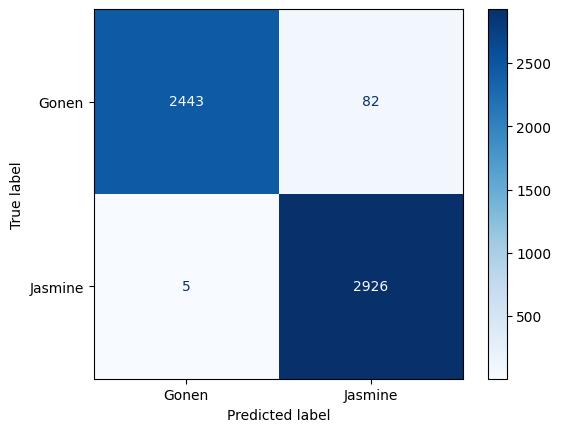

In [58]:
test_predictions = (model.predict(test_inputs) > 0.5).astype(int)
cm = confusion_matrix(test_classes, test_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Gonen', 'Jasmine'])
cm_display.plot(cmap=cmap)
plt.show()

Epoch 1/10
637/637 [==============================] - 1s 2ms/step - loss: 0.5888 - accuracy: 0.9583 - val_loss: 0.6397 - val_accuracy: 0.9572
Epoch 2/10
637/637 [==============================] - 1s 2ms/step - loss: 0.5829 - accuracy: 0.9579 - val_loss: 2.1696 - val_accuracy: 0.8138
Epoch 3/10
637/637 [==============================] - 1s 1ms/step - loss: 0.5338 - accuracy: 0.9576 - val_loss: 0.1467 - val_accuracy: 0.9855
Epoch 4/10
637/637 [==============================] - 1s 1ms/step - loss: 0.6706 - accuracy: 0.9552 - val_loss: 0.1606 - val_accuracy: 0.9851
Epoch 5/10
637/637 [==============================] - 1s 2ms/step - loss: 0.5745 - accuracy: 0.9579 - val_loss: 0.1660 - val_accuracy: 0.9851
Epoch 6/10
637/637 [==============================] - 1s 1ms/step - loss: 0.4954 - accuracy: 0.9590 - val_loss: 0.0703 - val_accuracy: 0.9839
Epoch 7/10
637/637 [==============================] - 1s 2ms/step - loss: 0.3014 - accuracy: 0.9672 - val_loss: 0.2433 - val_accuracy: 0.9599
Epoch 

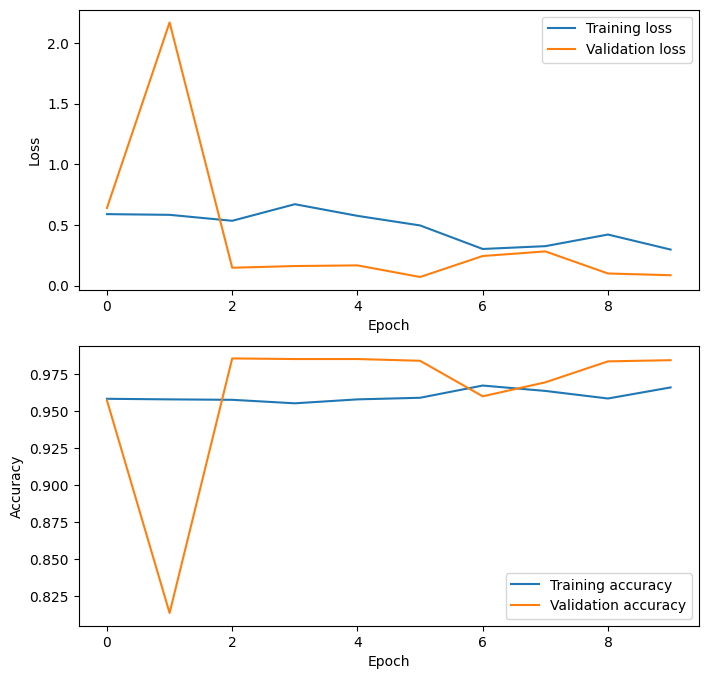

In [59]:
history = model.fit(train_inputs, train_classes, validation_split=0.2, epochs=10, batch_size=16)

fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].plot(history.history['loss'], label='Training loss')
ax[0].plot(history.history['val_loss'], label='Validation loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'], label='Training accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.show()

In [60]:
model = Sequential()
model.add(Dense(8, input_dim = 3, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_inputs2, train_classes2, epochs=10, batch_size=16)

loss, accuracy = model.evaluate(test_inputs2, test_classes2)
set2.append(accuracy)
print(f'Loss: {loss}, Dokładność: {accuracy}')

Epoch 1/10
796/796 [==============================] - 2s 1ms/step - loss: 0.2048 - accuracy: 0.9718
Epoch 2/10
796/796 [==============================] - 1s 1ms/step - loss: 0.0425 - accuracy: 0.9865
Epoch 3/10
796/796 [==============================] - 1s 1ms/step - loss: 0.0391 - accuracy: 0.9873
Epoch 4/10
796/796 [==============================] - 1s 1ms/step - loss: 0.0377 - accuracy: 0.9881
Epoch 5/10
796/796 [==============================] - 1s 1ms/step - loss: 0.0369 - accuracy: 0.9885
Epoch 6/10
796/796 [==============================] - 1s 1ms/step - loss: 0.0362 - accuracy: 0.9881
Epoch 7/10
796/796 [==============================] - 1s 1ms/step - loss: 0.0356 - accuracy: 0.9883
Epoch 8/10
796/796 [==============================] - 1s 1ms/step - loss: 0.0354 - accuracy: 0.9886
Epoch 9/10
796/796 [==============================] - 1s 1ms/step - loss: 0.0351 - accuracy: 0.9884
Epoch 10/10
171/171 [==============================] - 0s 1ms/step - loss: 0.0315 - accuracy: 0.9901

171/171 [==============================] - 0s 945us/step


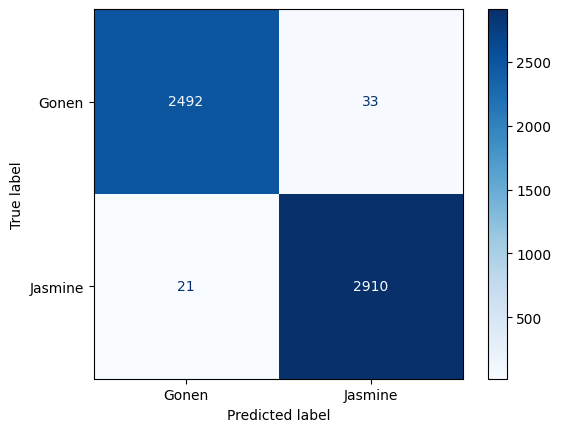

In [61]:
test_predictions = (model.predict(test_inputs2) > 0.5).astype(int)
cm = confusion_matrix(test_classes2, test_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Gonen', 'Jasmine'])
cm_display.plot(cmap=cmap)
plt.show()

Epoch 1/10
637/637 [==============================] - 1s 2ms/step - loss: 0.0366 - accuracy: 0.9884 - val_loss: 0.0272 - val_accuracy: 0.9902
Epoch 2/10
637/637 [==============================] - 1s 2ms/step - loss: 0.0361 - accuracy: 0.9887 - val_loss: 0.0258 - val_accuracy: 0.9921
Epoch 3/10
637/637 [==============================] - 1s 2ms/step - loss: 0.0363 - accuracy: 0.9887 - val_loss: 0.0259 - val_accuracy: 0.9921
Epoch 4/10
637/637 [==============================] - 1s 2ms/step - loss: 0.0362 - accuracy: 0.9890 - val_loss: 0.0264 - val_accuracy: 0.9910
Epoch 5/10
637/637 [==============================] - 1s 2ms/step - loss: 0.0360 - accuracy: 0.9886 - val_loss: 0.0263 - val_accuracy: 0.9918
Epoch 6/10
637/637 [==============================] - 1s 2ms/step - loss: 0.0358 - accuracy: 0.9890 - val_loss: 0.0261 - val_accuracy: 0.9921
Epoch 7/10
637/637 [==============================] - 1s 2ms/step - loss: 0.0358 - accuracy: 0.9889 - val_loss: 0.0262 - val_accuracy: 0.9906
Epoch 

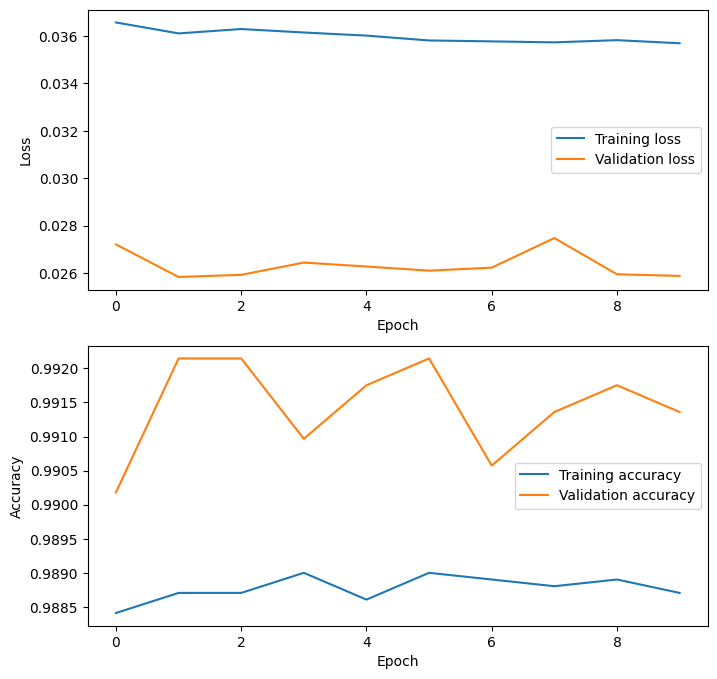

In [62]:
history = model.fit(train_inputs2, train_classes2, validation_split=0.2, epochs=10, batch_size=16)

fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].plot(history.history['loss'], label='Training loss')
ax[0].plot(history.history['val_loss'], label='Validation loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'], label='Training accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.show()

In [63]:
# 11. modyfikacja 4: zwiększenie liczby neuronów w warstwach
model = Sequential()
model.add(Dense(128, input_dim=10, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_inputs, train_classes, epochs=10, batch_size=32)

loss, accuracy = model.evaluate(test_inputs, test_classes)
set1.append(accuracy)
print(f'Loss: {loss}, Dokładność: {accuracy}')

Epoch 1/10
398/398 [==============================] - 2s 2ms/step - loss: 6.7432 - accuracy: 0.7867
Epoch 2/10
398/398 [==============================] - 1s 2ms/step - loss: 1.5538 - accuracy: 0.8606
Epoch 3/10
398/398 [==============================] - 1s 2ms/step - loss: 1.0960 - accuracy: 0.9088
Epoch 4/10
398/398 [==============================] - 1s 1ms/step - loss: 0.4506 - accuracy: 0.9507
Epoch 5/10
398/398 [==============================] - 1s 1ms/step - loss: 0.8011 - accuracy: 0.9384
Epoch 6/10
398/398 [==============================] - 1s 2ms/step - loss: 1.8376 - accuracy: 0.8965
Epoch 7/10
398/398 [==============================] - 1s 2ms/step - loss: 1.0207 - accuracy: 0.9366
Epoch 8/10
398/398 [==============================] - 1s 2ms/step - loss: 0.6783 - accuracy: 0.9503
Epoch 9/10
398/398 [==============================] - 1s 1ms/step - loss: 1.1877 - accuracy: 0.9294
Epoch 10/10
171/171 [==============================] - 0s 1ms/step - loss: 0.4359 - accuracy: 0.9710

171/171 [==============================] - 0s 865us/step


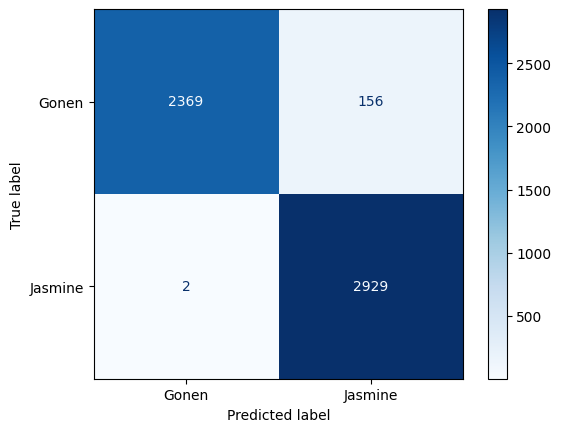

In [64]:
test_predictions = (model.predict(test_inputs) > 0.5).astype(int)
cm = confusion_matrix(test_classes, test_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Gonen', 'Jasmine'])
cm_display.plot(cmap=cmap)
plt.show()

Epoch 1/10
319/319 [==============================] - 1s 3ms/step - loss: 0.6419 - accuracy: 0.9579 - val_loss: 2.8369 - val_accuracy: 0.8680
Epoch 2/10
319/319 [==============================] - 1s 3ms/step - loss: 1.7082 - accuracy: 0.9282 - val_loss: 0.8755 - val_accuracy: 0.9525
Epoch 3/10
319/319 [==============================] - 1s 3ms/step - loss: 0.6193 - accuracy: 0.9603 - val_loss: 0.1246 - val_accuracy: 0.9827
Epoch 4/10
319/319 [==============================] - 1s 3ms/step - loss: 0.7792 - accuracy: 0.9547 - val_loss: 1.9554 - val_accuracy: 0.9140
Epoch 5/10
319/319 [==============================] - 1s 3ms/step - loss: 1.1873 - accuracy: 0.9394 - val_loss: 1.1541 - val_accuracy: 0.9152
Epoch 6/10
319/319 [==============================] - 1s 3ms/step - loss: 0.7177 - accuracy: 0.9571 - val_loss: 0.1984 - val_accuracy: 0.9839
Epoch 7/10
319/319 [==============================] - 1s 3ms/step - loss: 0.5473 - accuracy: 0.9649 - val_loss: 1.1219 - val_accuracy: 0.9450
Epoch 

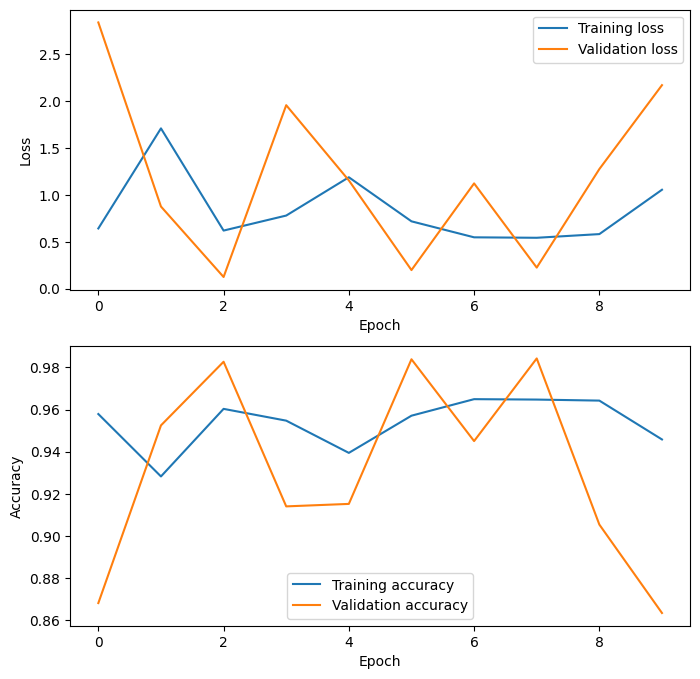

In [65]:
history = model.fit(train_inputs, train_classes, validation_split=0.2, epochs=10, batch_size=32)

fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].plot(history.history['loss'], label='Training loss')
ax[0].plot(history.history['val_loss'], label='Validation loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'], label='Training accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.show()

In [66]:
model = Sequential()
model.add(Dense(16, input_dim = 3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_inputs2, train_classes2, epochs=10, batch_size=32)

loss, accuracy = model.evaluate(test_inputs2, test_classes2)
set2.append(accuracy)
print(f'Loss: {loss}, Dokładność: {accuracy}')

Epoch 1/10
398/398 [==============================] - 2s 2ms/step - loss: 0.2204 - accuracy: 0.9350
Epoch 2/10
398/398 [==============================] - 1s 2ms/step - loss: 0.0443 - accuracy: 0.9873
Epoch 3/10
398/398 [==============================] - 1s 2ms/step - loss: 0.0392 - accuracy: 0.9879
Epoch 4/10
398/398 [==============================] - 1s 2ms/step - loss: 0.0380 - accuracy: 0.9880
Epoch 5/10
398/398 [==============================] - 1s 2ms/step - loss: 0.0372 - accuracy: 0.9877
Epoch 6/10
398/398 [==============================] - 1s 2ms/step - loss: 0.0367 - accuracy: 0.9885
Epoch 7/10
398/398 [==============================] - 1s 2ms/step - loss: 0.0365 - accuracy: 0.9880
Epoch 8/10
398/398 [==============================] - 1s 2ms/step - loss: 0.0357 - accuracy: 0.9887
Epoch 9/10
398/398 [==============================] - 1s 2ms/step - loss: 0.0359 - accuracy: 0.9881
Epoch 10/10
171/171 [==============================] - 1s 2ms/step - loss: 0.0320 - accuracy: 0.9901

171/171 [==============================] - 0s 2ms/step


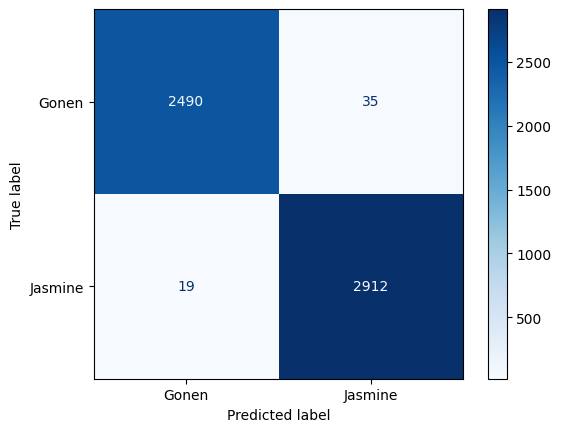

In [67]:
test_predictions = (model.predict(test_inputs2) > 0.5).astype(int)
cm = confusion_matrix(test_classes2, test_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Gonen', 'Jasmine'])
cm_display.plot(cmap=cmap)
plt.show()

Epoch 1/10
319/319 [==============================] - 1s 2ms/step - loss: 0.0373 - accuracy: 0.9880 - val_loss: 0.0272 - val_accuracy: 0.9910
Epoch 2/10
319/319 [==============================] - 1s 2ms/step - loss: 0.0368 - accuracy: 0.9879 - val_loss: 0.0271 - val_accuracy: 0.9906
Epoch 3/10
319/319 [==============================] - 1s 3ms/step - loss: 0.0367 - accuracy: 0.9880 - val_loss: 0.0269 - val_accuracy: 0.9910
Epoch 4/10
319/319 [==============================] - 1s 2ms/step - loss: 0.0363 - accuracy: 0.9879 - val_loss: 0.0284 - val_accuracy: 0.9902
Epoch 5/10
319/319 [==============================] - 1s 2ms/step - loss: 0.0364 - accuracy: 0.9885 - val_loss: 0.0274 - val_accuracy: 0.9898
Epoch 6/10
319/319 [==============================] - 1s 2ms/step - loss: 0.0360 - accuracy: 0.9882 - val_loss: 0.0266 - val_accuracy: 0.9914
Epoch 7/10
319/319 [==============================] - 1s 2ms/step - loss: 0.0359 - accuracy: 0.9882 - val_loss: 0.0269 - val_accuracy: 0.9910
Epoch 

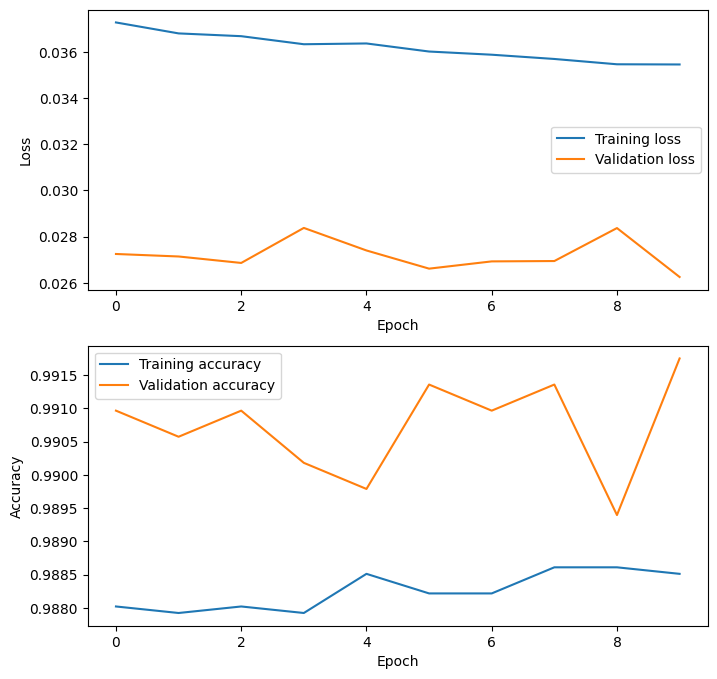

In [68]:
history = model.fit(train_inputs2, train_classes2, validation_split=0.2, epochs=10, batch_size=32)

fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].plot(history.history['loss'], label='Training loss')
ax[0].plot(history.history['val_loss'], label='Validation loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'], label='Training accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.show()

## Wnioski

In [69]:
# Interpretacja krzywych uczenia:
# Jeśli wartości funkcji straty maleją na zbiorze treningowym i walidacyjnym, to sieć dobrze się uczy.
# Jeśli wartość funkcji straty maleje na zbiorze treningowym, ale rośnie na zbiorze walidacyjnym, to sieć jest przeuczona.
# Jeśli wartość funkcji straty na zbiorze treningowym maleje, ale jest stała na zbiorze walidacyjnym, to sieć może nie być
# wystarczająco złożona, żeby nauczyć się danych.

In [70]:
set1 = [round(i, 3) for i in set1]
set2 = [round(i, 3) for i in set2]
index = [i for i in range(1, len(set1)+1)]
zestawienie = pd.DataFrame(data={'Dane 1': set1,
                                 'Dane 2': set2},
                          index = index)
zestawienie.transpose()

,1,2,3,4,5,6,7,8,9,10,11
Dane 1,0.984,0.989,0.977,0.985,0.984,0.979,0.965,0.978,0.982,0.984,0.971
Dane 2,0.985,0.989,0.979,0.988,0.989,0.990,0.989,0.989,0.990,0.990,0.990


In [71]:
# Klasyfikatory wypadają dobrze, ponieważ mają ponad 90% dokładności.
# Drzewo decyzyjne dla bazy przeskalowanej i nie przeskalowanej daje taką samą (bardzo zbliżoną) dokładność.
# Natomiast klasyfikatory naiwny Bayes (3) i k-najlbliższych (4, 5, 6) sąsiadów mają wyższą dokładność dla bazy znormalizowanej.
# Ogólnie sieci neuronowe (od 7 do 11) mają największe dokładności dla drugich danych, dla danych pierwszych nie są tak dobre.

## Bibliografia
Dane:
- https://www.kaggle.com/datasets/mssmartypants/rice-type-classification